Train to detect person, car, and bike

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
import os
import cv2
import random

# Define dataset paths
DATADIR = "./new_data/"
ANNOTATIONS_FILE = 'train_labels_8_bit.txt'  # CSV file with bounding boxes and labels
CATEGORIES = ["car", "person", "bike"]  # Object categories


In [3]:
# # Load annotations
# df = pd.read_csv(ANNOTATIONS_FILE, sep=" ", names=["image_file", "class_id", "x_min", "y_min", "x_max", "y_max"])
# # reduce size of dataframe for testing purposes
# df = df[0:15]

# # make y variables
# y_train = np.array(df[['class_id']]-1)
# y_bboxes = np.array(df[["x_min", "y_min", "x_max", "y_max"]])
# y_train, y_bboxes
# df

In [ ]:
# creating data
data = []
IMG_SIZE = 150

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()
random.shuffle(data)
len(data)

1

In [12]:
# make X and y
X = []
y = []

for features, label in data:
    X.append(features)
    y.append(label)

y = np.array(y)
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X = X.astype('float32') / 255.0


# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


ValueError: With n_samples=1, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

# Create the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 1)),
    MaxPooling2D((2, 2)),

    Dropout(0.5),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Dropout(0.5),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(CATEGORIES), activation='softmax')
])

model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
    

# Print model summary
# model.summary()



NameError: name 'X_train' is not defined

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=64)

Epoch 1/7
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 186ms/step - accuracy: 0.1578 - loss: 1.2216
Epoch 2/7
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 192ms/step - accuracy: 0.5111 - loss: 1.0592
Epoch 3/7
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step - accuracy: 0.5133 - loss: 0.9956
Epoch 4/7
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step - accuracy: 0.7467 - loss: 0.7407
Epoch 5/7
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/step - accuracy: 0.9378 - loss: 0.3455
Epoch 6/7
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step - accuracy: 1.0000 - loss: 0.0401
Epoch 7/7
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - accuracy: 1.0000 - loss: 0.0111


In [11]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)

# Print the test results
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_acc}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step - accuracy: 0.3333 - loss: 2.7291
Test loss: 2.7291347980499268
Test accuracy: 0.3333333432674408


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


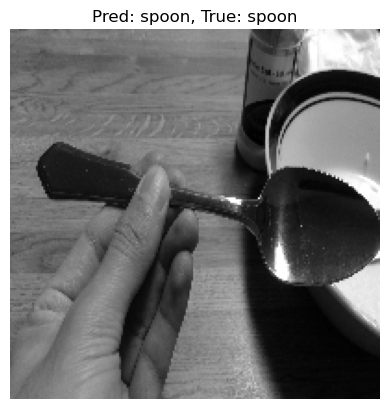

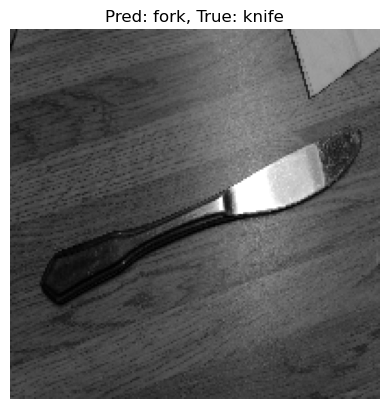

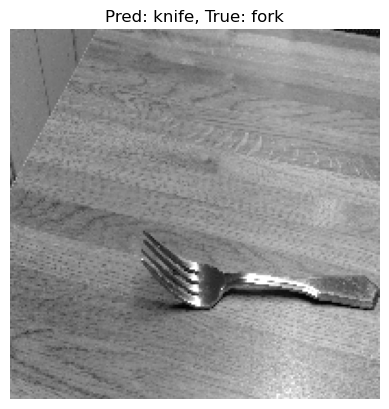

In [12]:
# Get predictions on the test set
y_pred = model.predict(X_test)

# Display some test images with their predicted and actual labels
num_images = 3  # Number of images to display
for i in range(num_images):
    # Get the image, predicted label, and true label
    image = X_test[i].reshape(IMG_SIZE, IMG_SIZE)  # Reshape if needed (depends on your input shape)
    predicted_label = np.argmax(y_pred[i])  # Get the predicted class index
    true_label = y_test[i]  # True label
    
    # Display the image
    plt.imshow(image, cmap='gray')  # Use 'gray' for grayscale images
    plt.title(f"Pred: {CATEGORIES[predicted_label]}, True: {CATEGORIES[true_label]}")
    plt.axis('off')  # Hide axes
    plt.show()